## LIBRARY IMPORT

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns

import pyarrow.parquet as pq

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import warnings

In [2]:
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

## READ DATA

In [3]:
reviews = pq.read_pandas('reviews.parquet').to_pandas()
returns = pq.read_pandas('returns.parquet').to_pandas()
return_reasons = pq.read_pandas('return_reasons.parquet').to_pandas()
products = pq.read_pandas('products.parquet').to_pandas()
test = pq.read_pandas('test.parquet').to_pandas()

## HEAD 

In [4]:
reviews.head()

,order_item_id,product_id,customer_id,review_text,shop_id,rating,date_created
0,19068657,641695ab1f06465947d1e4e26f61ed308145dce718d9b6...,0aaefdb4bd01799d678f7fcd453e23c597804eb006f1ce...,товар потерян,c2f61742e5f0ef0a74c5fcbeff7ff659def91bf4b5f1e1...,1,2023-10-17 17:26:42.874
1,11130626,2c0818e03896a3e27fd8ec01ba9d7ae80d97673575a847...,851513a761b89239303515254d0e9c22a8474dd2df60b8...,,757db91a80964d58a2b0d26bffd641bcbe142aae4f7f47...,5,2023-07-27 10:06:40.711
2,8992153,d00a0a981e5618c4f96802e79c205ef2175b141edff368...,96659e77ab5e9b52ecbf110eed661c3fe742fc42443d50...,,8f0f97e140e126a4404a09eb1e14a53b7c742701c4290a...,5,2023-07-03 14:47:59.316
3,11078898,d0d9bad11fa6fedcf5c699055137a36f4c4c81d722b5fd...,321667e5d0ada2fa7f2356076f88a3848e596cde7bd120...,"Rahmat, juda yoqdi!",61182f39851829ca78c919a83ecbfa045fc0686bff16d0...,5,2023-07-30 12:26:59.864
4,32080499,4edd99b2e2a203a18cf24b6a2b134833ef1f74cf1940c0...,d67c451b69c7f706cedf6d4a87f1180ea62acd57c94a29...,16гб работает хорошо,02cca3803b564ede11ccf9f303c9910b39c532061e7a8c...,5,2024-01-19 06:02:57.971


In [5]:
returns.head()

,id,product_id,cause,comment,date_created,order_item_id,customer_id,purchase_price
index,,,,,,,,
0,69138,6a1a7601fac958ee967c73fe19315db8f6cdc3f1cd8370...,DEFECTED,брак,2023-01-02 05:37:33.846,588140,b4465ede5691891836ccc432bb8c49e1537b1d0a74f721...,106000
1,69148,7cab221310edf5f3c75fc38259bcb7640d080b4b05d5bb...,PHOTO_MISMATCH,думала больше,2023-01-02 05:44:34.432,773695,9bf74458174dd9c039ee6317fd48b356e8fc146f23c60b...,23000
2,69154,728611508a21a9214f2c8cc076d21e30046ec5c59bf359...,DEFECTED,брак,2023-01-02 05:45:31.277,695067,0a185871d03ee346b71b657d3fbaebfc35823fec2861f7...,390000
3,69161,f4f4031321f9b7cf1175fc6d363769297334ddd76aa2eb...,WRONG_ITEM,не тот товар,2023-01-02 05:57:35.652,635687,1123ce2b71eb64c572e6de0e14a723c17a55f67748327d...,71000
4,69165,c8f3f349fa927aae5fc954c5268b578b9916a908bb1f8a...,DEFECTED,не включается и не работает,2023-01-02 05:59:34.447,764986,95cd02979c6f97dc58590f7c0e6c421d7c3db2b9e7212b...,84000


In [6]:
return_reasons.head()

,id,reason
0,1,DEFECTED
1,2,WRONG_ITEM
2,3,BAD_QUALITY
3,4,PHOTO_MISMATCH
4,5,WRONG_SIZE


In [7]:
products.head()

,product_id,category_id,category_title,product_description
0,8527a891e224136950ff32ca212b45bc93f69fbb801c3b...,11e8a99b4c0365cebe27119acceed979ac36829490f239...,Крышки,None
1,c6f3ac57944a531490cd39902d0f777715fd005efac9a3...,0588f1e6722b3743f34a85fa93d75a85d024f425feca15...,"Кастрюли, ковши",None
2,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...,18c1e67c850703071585ed2f4796bf8a0b42601b891ed0...,Термосы,None
3,7a61b53701befdae0eeeffaecc73f14e20b537bb0f8b91...,7f72bf3dd662213fa8fbeb0c15f241fde2e5477a22762d...,Розетки и креманки,None
4,31489056e0916d59fe3add79e63f095af3ffb81604691f...,57a89c11968eb79532b49ad45ab2641f2024fbd097a2c6...,Сковороды,None


In [8]:
test.head()

,id,order_item_id,product_id,customer_id,purchase_price
0,3821007,25924705,c6e37feeae4ffb32c596278be5803dfbb2cae811a49f0a...,470a3be7a2064ccf6a2af3aa143422f8d73ac00ad8260e...,39000
1,3821335,26389794,104b05b6121c26b6376a7c78cfd904c33a5eea1107c71b...,91b874267fc80a4340b005cae70a9d7acd91e69dba7247...,87000
2,3821336,26389795,280443845f883cb83da5f4d5a6d838ed00ade8bd4b0685...,91b874267fc80a4340b005cae70a9d7acd91e69dba7247...,84000
3,3821337,26389792,84e5505da2298dafaeaafe7208cb51934c89bdac7dbae2...,91b874267fc80a4340b005cae70a9d7acd91e69dba7247...,158000
4,3821727,26549302,ddb80318c47647c6965ff30536323cfb2366ef63a4741b...,9862a7d705cf00508b564544b2ecd727c1d87b0cea704f...,239000


In [9]:
reviews.describe()

,order_item_id,rating,date_created
count,1.502889e+06,1.502889e+06,1502889
mean,1.880307e+07,4.527771e+00,2023-10-13 16:42:33.379371264
min,1.997000e+03,1.000000e+00,2023-01-01 03:49:43.116000
25%,1.165840e+07,5.000000e+00,2023-08-26 04:33:33.688999936
50%,1.980303e+07,5.000000e+00,2023-11-07 19:18:27.934000128
75%,2.620713e+07,5.000000e+00,2023-12-21 15:00:51.480000
max,4.295879e+07,5.000000e+00,2024-01-31 23:57:58.118000
std,8.946127e+06,1.148432e+00,NaN


In [16]:
returns.describe()

,id,date_created,order_item_id,purchase_price
count,2.821410e+05,282141,2.821410e+05,2.821410e+05
mean,1.771597e+06,2023-08-06 00:17:44.798731264,1.308551e+07,1.399109e+05
min,6.913800e+04,2023-01-02 05:37:33.846000,4.113600e+04,1.000000e+03
25%,7.955010e+05,2023-06-06 13:48:55.624999936,6.784127e+06,3.500000e+04
50%,1.705829e+06,2023-08-18 12:01:49.761999872,1.296604e+07,7.900000e+04
75%,2.660751e+06,2023-10-15 14:21:27.465999872,1.912008e+07,1.620000e+05
max,3.819468e+06,2023-12-09 22:03:27.609000,2.660822e+07,1.399900e+07
std,1.086603e+06,NaN,7.250281e+06,2.707904e+05


In [17]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502889 entries, 0 to 1502888
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   order_item_id  1502889 non-null  int64         
 1   product_id     1502889 non-null  object        
 2   customer_id    1502889 non-null  object        
 3   review_text    1502888 non-null  object        
 4   shop_id        1502889 non-null  object        
 5   rating         1502889 non-null  int64         
 6   date_created   1502889 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 80.3+ MB


In [18]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282141 entries, 0 to 282140
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              282141 non-null  int64         
 1   product_id      282141 non-null  object        
 2   cause           282141 non-null  object        
 3   comment         282141 non-null  object        
 4   date_created    282141 non-null  datetime64[ns]
 5   order_item_id   282141 non-null  int64         
 6   customer_id     282141 non-null  object        
 7   purchase_price  282141 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 19.4+ MB


In [19]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113713 entries, 0 to 113712
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   product_id           113713 non-null  object
 1   category_id          113713 non-null  object
 2   category_title       113713 non-null  object
 3   product_description  96015 non-null   object
dtypes: object(4)
memory usage: 3.5+ MB


In [24]:
products.isna().sum()

product_id                 0
category_id                0
category_title             0
product_description    17698
dtype: int64

In [34]:
print('Number of returned orders: ', len(returns.order_item_id.unique()))
print('Number of returned orders, that have a record in REVIEWS TABLE: ', returns.order_item_id.isin(reviews.order_item_id).astype(int).sum())

Number of returned orders:  281958
Number of returned orders, that have a record in REVIEWS TABLE:  17782


As we can see not all orders have a record in the "REVIEWS TABLE"

## DATA VISUALIZATION 

<Axes: >

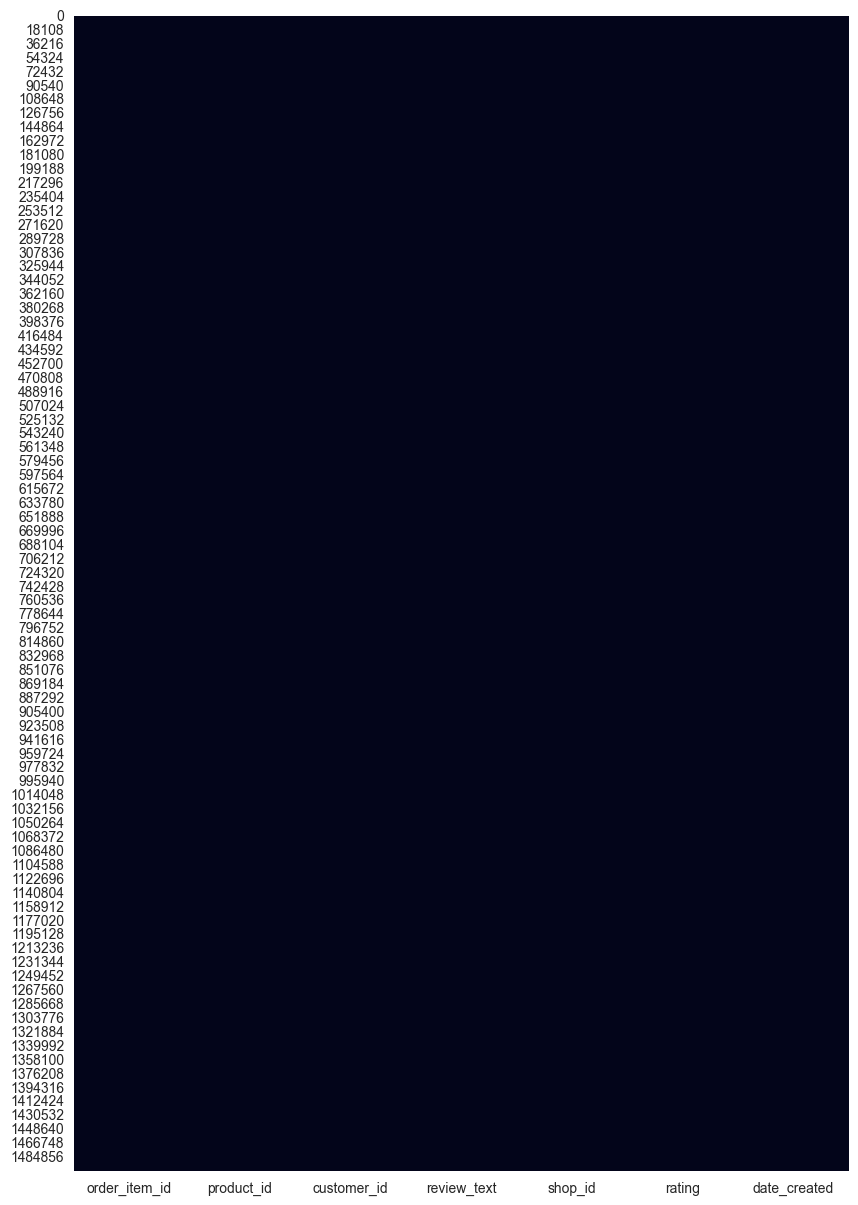

In [10]:
figure(figsize=(10, 15))
sns.heatmap(reviews.isnull(), cbar=False)

<Axes: ylabel='index'>

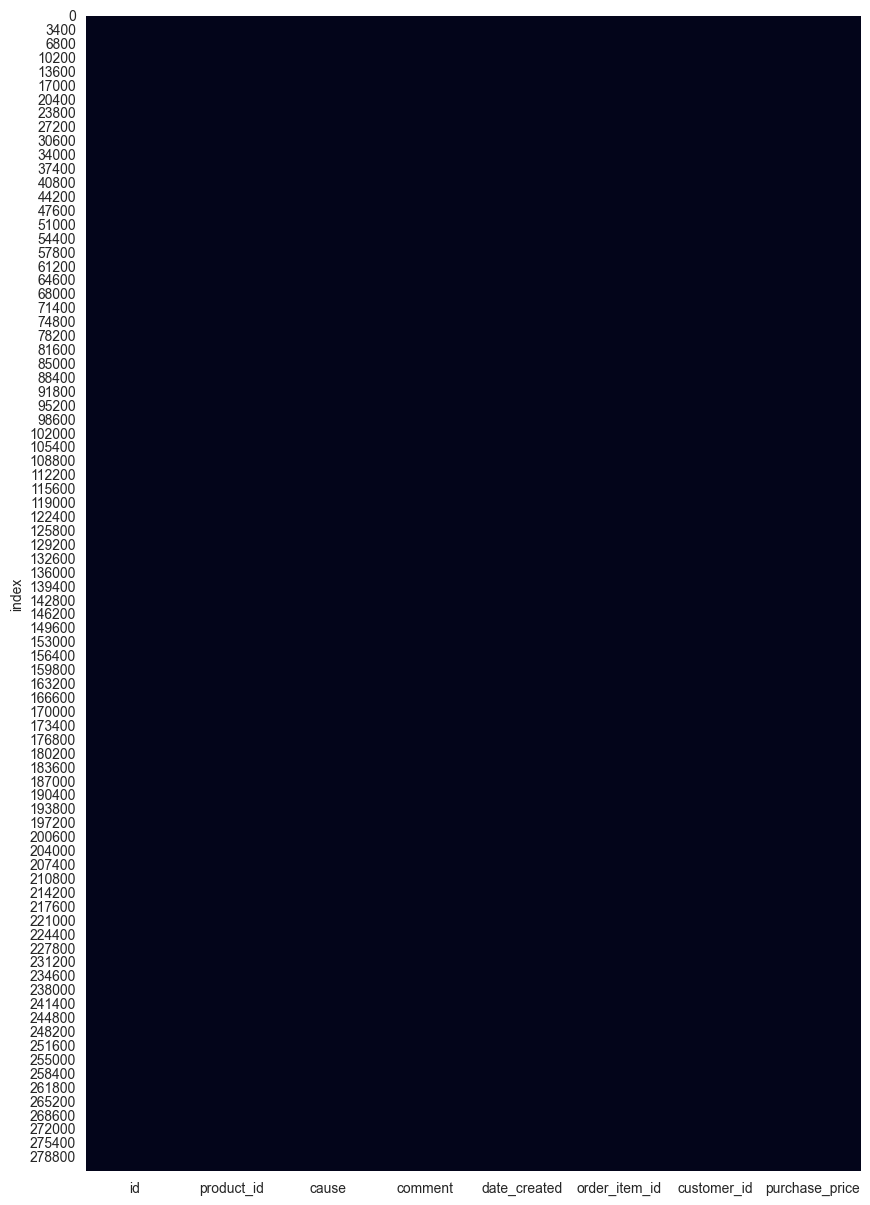

In [11]:
figure(figsize=(10, 15))
sns.heatmap(returns.isnull(), cbar=False)

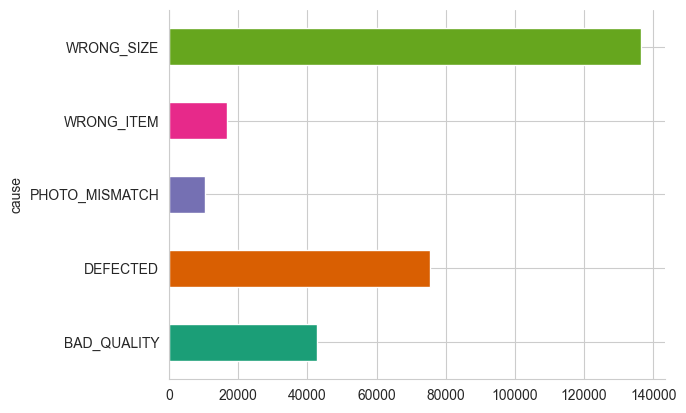

In [12]:
returns.groupby('cause').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

We can notice that the distribution of target variable is uneven. So, in order not to get overfitting, in the operation of dividing into train/test samples we should point out the in "statisfy" parametr out target variable.

Text(0, 0.5, 'Frequency (in millions)')

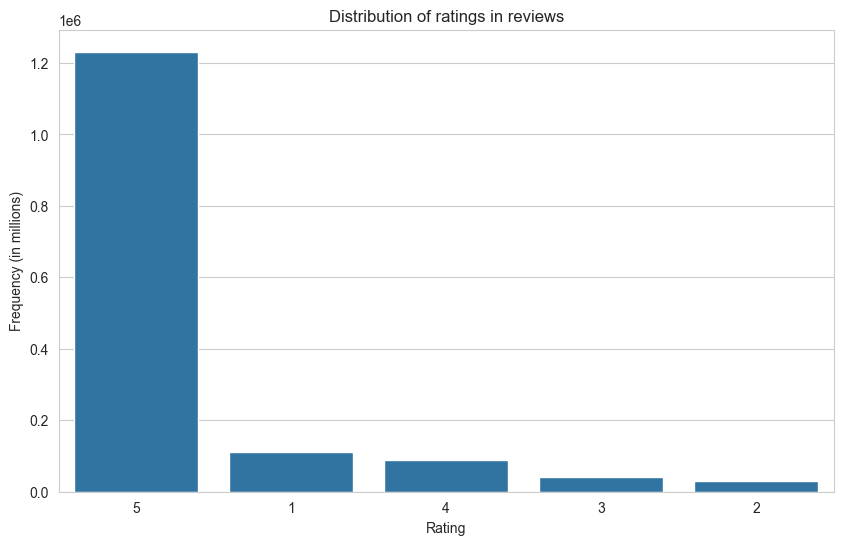

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=reviews, order=reviews['rating'].value_counts().index)
plt.title('Distribution of ratings in reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency (in millions)')

We can notice that an enormous part of products has rating "5".

## FEATURE ENGINEERING

In [20]:
products.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['product_id', 'category_id', 'category_title', 'product_description'], dtype='object')>

In [23]:
print('Number of objects in the product table', products.shape[0])
print('Number of category title', len(products['category_title'].unique()))
print('Number of category id', len(products['category_id'].unique().sum()))

Number of objects in the product table 113713
Number of category title 4007
Number of category id 187520


Based on analysis of "products" table decided not to use "category" feature. This feature has too many unique values, which are very difficult to represent in numeric form. For example, if we use ONE HOT ENCODING the number of colums in out table will be to big.

But, we can try to use LabelEncoding for category column in products table. In that case probably we can get good numeric values 

#### Creating new features 

From data test table, we can notice that for prediction from useful features we are given only:


- product id - we can count how many times orders were returned with different reasons

- shop id -  from product id we can figure out its shop id, and count how many times different products from this shop were returned with different reasons

- customer id - we can count how many times a customer returned products and what were the reasons

- purchase price

In [38]:
### PREPROCESSING FOR ONE HOT ENCODING

In [25]:
product_list = {}
shop_list = {}
customer_list = {}

orders_set = set()

In [35]:
def create_empty_reasons_dict(dct: dict):
    '''
    Function for creating of dictionary with 5 keys:

    SUCCESSFULL - to keep number of orders which were not returned
    WRONG_SIZE - to keep number of orders which were returned because of WRONG SIZE 
    WRONG_ITEM - to keep number of orders which were returned because of WRONG ITEM
    PHOTO_MISMATCH - to keep number of orders which were returned because of PHOTO MISMATCH
    DEFECTED -  to keep number of orders which were returned because of DEFECTED
    BAD_QUALITY - to keep number of orders which were returned because of BAD QUALITY 
    '''
    dct['SUCCESSFUL'] = 0

    for reason in return_reasons.reason:
        dct[reason] = 0

In [36]:
for i in range(reviews.shape[0]):
    # create an empty dictionary for a new product id
    if reviews.product_id[i] not in product_list.keys():
        product_list[reviews.product_id[i]] = dict()
        create_empty_reasons_dict(product_list[reviews.product_id[i]])
    
    # create an empty dictionary for a new shop id
    if reviews.shop_id[i] not in shop_list.keys():
        shop_list[reviews.shop_id[i]] = dict()
        create_empty_reasons_dict(shop_list[reviews.shop_id[i]])
    
    # create an empty dictionary for a new customer id
    if reviews.customer_id[i] not in customer_list.keys():
        customer_list[reviews.customer_id[i]] = dict()
        create_empty_reasons_dict(customer_list[reviews.customer_id[i]])

    
    # for that product's order id find in RETURNS dataframe
    returns_index_list = returns.index[returns['order_item_id'] == reviews.order_item_id[i]].tolist()
    
    # counting the data
    if len(returns_index_list) == 0:
        product_list[reviews.product_id[i]]['SUCCESSFUL'] += 1
        shop_list[reviews.shop_id[i]]['SUCCESSFUL'] += 1
        customer_list[reviews.customer_id[i]]['SUCCESSFUL'] += 1
    else:
        for index in returns_index_list:
            product_list[reviews.product_id[i]][returns['cause'][index]] += 1
            shop_list[reviews.shop_id[i]][returns['cause'][index]] += 1
            customer_list[reviews.customer_id[i]][returns['cause'][index]] += 1

            orders_set.add(returns['order_item_id'][index])

In [37]:
product_to_shop = dict() # to figure out a product belonging to the shop

In [39]:
for i in range(reviews.shape[0]):
    if reviews.product_id[i] in product_to_shop.keys():
        continue

    product_to_shop[reviews.product_id[i]] = reviews.shop_id[i]

In [40]:
without_shop = []

for i in range(returns.shape[0]):
    if returns.order_item_id[i] in orders_set:
        continue
    
    # for product
    if returns.product_id[i] not in product_list.keys():
        product_list[returns.product_id[i]] = dict()
        product_list[returns.product_id[i]]['SUCCESSFUL'] = 0
    
        for reason in return_reasons.reason:
            product_list[returns.product_id[i]][reason] = 0
    
    # for customer
    if returns.customer_id[i] not in customer_list.keys():
        customer_list[returns.customer_id[i]] = dict()
        customer_list[returns.customer_id[i]]['SUCCESSFUL'] = 0
    
        for reason in return_reasons.reason:
            customer_list[returns.customer_id[i]][reason] = 0

    # check if there such product in reviews DataSet
    if returns.product_id[i] not in product_to_shop.keys():
        without_shop.append(i)
        continue
    # for shop
    shop = product_to_shop[returns.product_id[i]]
    if shop not in shop_list.keys():
        shop_list[shop] = dict()
        shop_list[shop]['SUCCESSFUL'] = 0

        for reason in return_reasons.reason:
            shop_list[shop][reason] = 0

    # add additional value for cause
    product_list[returns.product_id[i]][returns.cause[i]] += 1
    shop_list[shop][returns.cause[i]] += 1
    customer_list[returns.customer_id[i]][returns.cause[i]] += 1

In [41]:
product_rating = dict()

for i in range(reviews.shape[0]):
    if reviews.product_id[i] not in product_rating.keys():
        product_rating[reviews.product_id[i]] = [0 , 0]
    
    product_rating[reviews.product_id[i]][0] += reviews.rating[i]
    product_rating[reviews.product_id[i]][1] += 1

In [42]:
for rating in product_rating.keys():
    product_rating[rating].append(product_rating[rating][0] / product_rating[rating][1])

In [43]:
df = returns.copy()

In [44]:
df.insert(3, 'product_' + return_reasons.reason[0], [0] * df.shape[0])
df.insert(4, 'product_' + return_reasons.reason[1], [0] * df.shape[0])
df.insert(5, 'product_' + return_reasons.reason[2], [0] * df.shape[0])
df.insert(6, 'product_' + return_reasons.reason[3], [0] * df.shape[0])
df.insert(7, 'product_' + return_reasons.reason[4], [0] * df.shape[0])

In [45]:
for i in range(df.shape[0]):
    for j in range(return_reasons.shape[0]):
        df.loc[i, 'product_' + return_reasons.reason[j]] = product_list[df.product_id[i]][return_reasons.reason[j]]

In [46]:
for j in range(return_reasons.shape[0]):
    df.insert(8 + j, 'shop_' + return_reasons.reason[j], [0] * df.shape[0])

In [47]:
for i in range(df.shape[0]):
    for j in range(return_reasons.shape[0]):
        if df.product_id[i] not in product_to_shop.keys():
            continue
        else:
            df.loc[i, 'shop_' + return_reasons.reason[j]] = shop_list[product_to_shop[df.product_id[i]]][return_reasons.reason[j]]

In [48]:
for j in range(return_reasons.shape[0]):
    df.insert(17 + j, 'customer_' + return_reasons.reason[j], [0] * df.shape[0])

In [49]:
for i in range(df.shape[0]):
    for j in range(return_reasons.shape[0]):
        df.loc[i, 'customer_' + return_reasons.reason[j]] = customer_list[df.customer_id[i]][return_reasons.reason[j]]

In [50]:
df.insert(23, 'average_rating', [0] * df.shape[0])

In [52]:
mn = 0
for key in product_rating.keys():
    mn += product_rating[key][2]
mn = mn / len(product_rating)

for i in range(df.shape[0]):
    if df.product_id[i] not in product_rating.keys():
        df.loc[i, "average_rating"] = mn  
        continue
    df.loc[i, "average_rating"] = product_rating[df.product_id[i]][2]

In [53]:
df.head()

,id,product_id,cause,product_DEFECTED,product_WRONG_ITEM,product_BAD_QUALITY,product_PHOTO_MISMATCH,product_WRONG_SIZE,shop_DEFECTED,shop_WRONG_ITEM,...,date_created,order_item_id,customer_id,customer_DEFECTED,customer_WRONG_ITEM,customer_BAD_QUALITY,customer_PHOTO_MISMATCH,customer_WRONG_SIZE,purchase_price,average_rating
index,,,,,,,,,,,,,,,,,,,,,
0,69138,6a1a7601fac958ee967c73fe19315db8f6cdc3f1cd8370...,DEFECTED,2,0,0,0,0,40,26,...,2023-01-02 05:37:33.846,588140,b4465ede5691891836ccc432bb8c49e1537b1d0a74f721...,5,0,1,0,6,106000,4.000000
1,69148,7cab221310edf5f3c75fc38259bcb7640d080b4b05d5bb...,PHOTO_MISMATCH,1,1,2,2,5,17,9,...,2023-01-02 05:44:34.432,773695,9bf74458174dd9c039ee6317fd48b356e8fc146f23c60b...,2,0,2,1,4,23000,4.776596
2,69154,728611508a21a9214f2c8cc076d21e30046ec5c59bf359...,DEFECTED,11,0,3,0,1,101,69,...,2023-01-02 05:45:31.277,695067,0a185871d03ee346b71b657d3fbaebfc35823fec2861f7...,2,0,0,0,0,390000,4.035714
3,69161,f4f4031321f9b7cf1175fc6d363769297334ddd76aa2eb...,WRONG_ITEM,0,2,0,0,1,52,28,...,2023-01-02 05:57:35.652,635687,1123ce2b71eb64c572e6de0e14a723c17a55f67748327d...,0,1,0,0,0,71000,1.000000
4,69165,c8f3f349fa927aae5fc954c5268b578b9916a908bb1f8a...,DEFECTED,1,0,0,0,0,268,49,...,2023-01-02 05:59:34.447,764986,95cd02979c6f97dc58590f7c0e6c421d7c3db2b9e7212b...,1,0,0,0,1,84000,4.666667


In [67]:
df = df.merge(products[['product_id', 'category_title']], how='inner', on='product_id')

### LABEL ENCODING 

In [61]:
from sklearn import preprocessing

In [69]:
# Let's encode category title column with numeric values
# and add them to our Data Frame.
category_title_encoder = preprocessing.LabelEncoder()
df['category_title_enc'] = category_title_encoder.fit_transform(df['category_title'])

## DEVIDING INTO TRAIN & TEST 

In [ ]:
df = df.drop(columns=[
    'product_id',
    'comment',
    'date_created',
    'order_item_id',
    'customer_id'
])

In [79]:
df.head()

,id,cause,product_DEFECTED,product_WRONG_ITEM,product_BAD_QUALITY,product_PHOTO_MISMATCH,product_WRONG_SIZE,shop_DEFECTED,shop_WRONG_ITEM,shop_BAD_QUALITY,...,shop_WRONG_SIZE,customer_DEFECTED,customer_WRONG_ITEM,customer_BAD_QUALITY,customer_PHOTO_MISMATCH,customer_WRONG_SIZE,purchase_price,average_rating,category_title,category_title_enc
0,69138,DEFECTED,2,0,0,0,0,40,26,30,...,56,5,0,1,0,6,106000,4.000000,"Yogʻochni kuydirib naqsh solish, yogʻochdan qi...",1443
1,69148,PHOTO_MISMATCH,1,1,2,2,5,17,9,54,...,77,2,0,2,1,4,23000,4.776596,Кошельки,2185
2,69154,DEFECTED,11,0,3,0,1,101,69,112,...,67,2,0,0,0,0,390000,4.035714,Аксессуары для маникюра и педикюра,1526
3,69161,WRONG_ITEM,0,2,0,0,1,52,28,205,...,2149,0,1,0,0,0,71000,1.000000,Лонгсливы,2258
4,69165,DEFECTED,1,0,0,0,0,268,49,202,...,175,1,0,0,0,1,84000,4.666667,Машинки для удаления катышек,2324


In [81]:
y = df["cause"]
X = df.drop(columns=['id', 'cause'])

In [98]:
X_num = X.drop(columns=['category_title']) # only numeric values
X_cat = X.drop(columns=['category_title_enc']) # without encoded CATEGORY TITLE COLUMN

In [99]:
X_num_train, X_num_test, X_cat_train, X_cat_test, \
y_train, y_test = train_test_split(X_num, X_cat, y, test_size = 0.2, random_state=42, stratify=y)

### EXPERIMENTING WITH DIFFERENT MODELS 

### Decision Tree

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
depths = np.arange(3, 20)
rf_metrics = []


for depth in depths:
    rfc = RandomForestClassifier(max_depth=depth)
    scores = cross_val_score(
        rfc, X_num_train, y_train, cv=5, 
        n_jobs=-1, scoring='precision_macro'
    )
    
    rf_metrics.append(np.mean(scores))

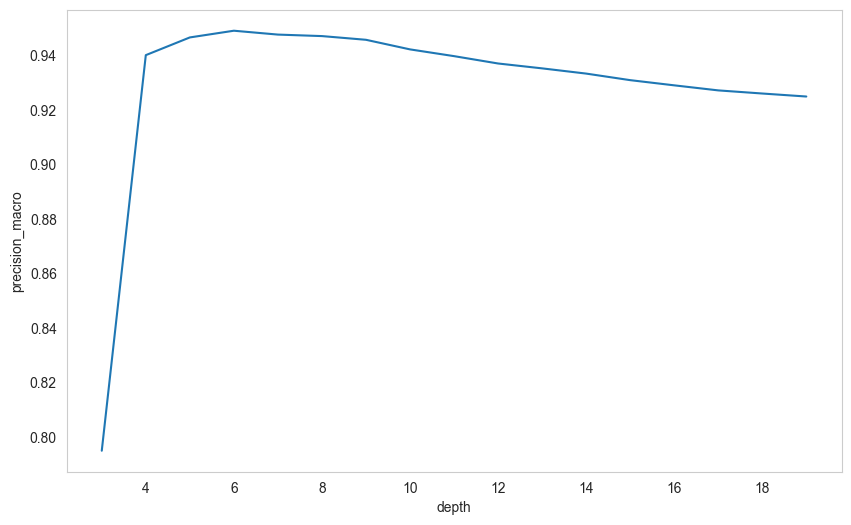

In [107]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(3, 20), rf_metrics)
plt.xlabel('depth')
plt.ylabel('precision_macro')
plt.grid()

As we can see, best performance at 6

In [109]:
rfc_ = RandomForestClassifier(max_depth=6)
rfc_.fit(X_num_train, y_train)

RandomForestClassifier(max_depth=6)

In [113]:
y_pred = rfc_.predict(X_num_test)
precision_score(y_test, y_pred, average='macro')

0.9478514467692574

Almost 95 % 

### GRADIENT BOOSTING with CatBoost

In [114]:
from catboost import CatBoostClassifier, Pool, cv

In [120]:
cat_features = np.arange(X_cat_train[['category_title']].shape[1]) + X_cat_train.drop(columns=['category_title']).shape[1]

train_dataset = Pool(data=X_cat_train, 
                     label=y_train, 
                     cat_features=cat_features)

test_dataset = Pool(data=X_cat_test,
                    label=y_test,
                    cat_features=cat_features)

In [126]:
depths = np.arange(3, 17)
boosting_metrics = []

for depth in depths:
    params = {"iterations": 100,
              "depth": depth,
              "loss_function": "MultiClass",
              "verbose": False}

    scores = cv(train_dataset,
                params,
                fold_count=5)
        
    boosting_metrics.append(scores['test-MultiClass-mean'][scores.index[-1]])

Training on fold [0/5]

bestTest = 0.3490998303
bestIteration = 99

Training on fold [1/5]

bestTest = 0.3499950932
bestIteration = 99

Training on fold [2/5]

bestTest = 0.3482008461
bestIteration = 99

Training on fold [3/5]

bestTest = 0.3498439584
bestIteration = 99

Training on fold [4/5]

bestTest = 0.3478373061
bestIteration = 99

Training on fold [0/5]

bestTest = 0.2972694088
bestIteration = 99

Training on fold [1/5]

bestTest = 0.2995319312
bestIteration = 99

Training on fold [2/5]

bestTest = 0.2967027187
bestIteration = 99

Training on fold [3/5]

bestTest = 0.2979251324
bestIteration = 99

Training on fold [4/5]

bestTest = 0.2969852049
bestIteration = 99

Training on fold [0/5]

bestTest = 0.2664500033
bestIteration = 99

Training on fold [1/5]

bestTest = 0.2683197906
bestIteration = 99

Training on fold [2/5]

bestTest = 0.2664356174
bestIteration = 99

Training on fold [3/5]

bestTest = 0.2672469607
bestIteration = 99

Training on fold [4/5]

bestTest = 0.2673296992


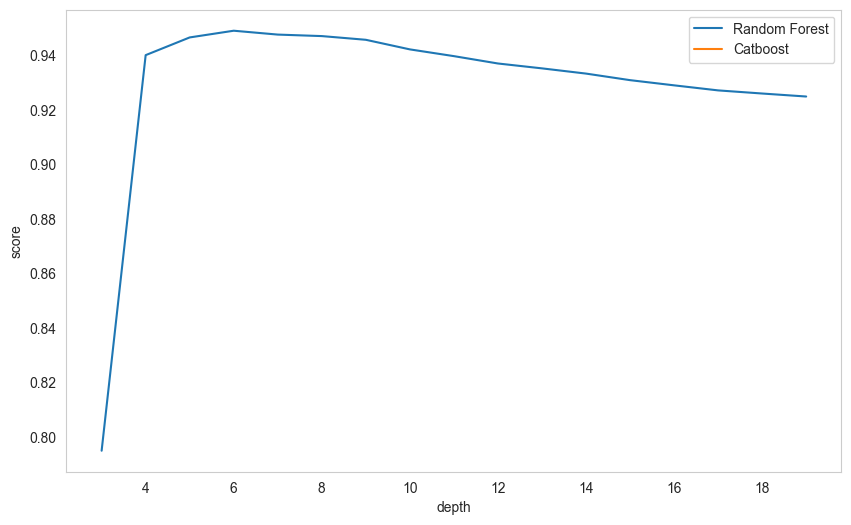

In [135]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(3, 20), rf_metrics, label='Random Forest')
plt.plot(np.arange(3, 17), boosting_metrics, label='Catboost')
plt.xlabel('depth')
plt.ylabel('score')
plt.grid()
plt.legend()

Not bad, but RFC is better

## PREDICTION with RFC 

In [136]:
for j in range(return_reasons.shape[0]):
    test.insert(3 + j, 'product_' + return_reasons.reason[j], [0] * test.shape[0])

In [137]:
for i in range(test.shape[0]):
    for j in range(return_reasons.shape[0]):
        if test.product_id[i] not in product_list.keys():
            continue
        test.loc[i, 'product_' + return_reasons.reason[j]] = product_list[test.product_id[i]][return_reasons.reason[j]]

In [138]:
for j in range(return_reasons.shape[0]):
    test.insert(8 + j, 'shop_' + return_reasons.reason[j], [0] * test.shape[0])

In [139]:
for i in range(test.shape[0]):
    for j in range(return_reasons.shape[0]):
        if test.product_id[i] not in product_to_shop.keys():
            continue
        else:
            test.loc[i, 'shop_' + return_reasons.reason[j]] = shop_list[product_to_shop[test.product_id[i]]][return_reasons.reason[j]]

In [140]:
for j in range(return_reasons.shape[0]):
    test.insert(15 + j, 'customer_' + return_reasons.reason[j], [0] * test.shape[0])

In [141]:
for i in range(test.shape[0]):
    for j in range(return_reasons.shape[0]):
        if test.customer_id[i] not in customer_list.keys():
            continue
        test.loc[i, 'customer_' + return_reasons.reason[j]] = customer_list[test.customer_id[i]][return_reasons.reason[j]]

In [142]:
test.insert(20, 'average_rating', [0] * test.shape[0])

In [143]:
for i in range(test.shape[0]):
    if test.product_id[i] not in product_rating.keys():
        test.loc[i, "average_rating"] = mn
        continue
    test.loc[i, "average_rating"] = product_rating[test.product_id[i]][2]

In [148]:
test = test.merge(products[['product_id', 'category_title']], how='inner', on='product_id')

In [150]:
test['category_title_enc'] = category_title_encoder.fit_transform(test['category_title'])

In [154]:
_test = test[[
    'product_DEFECTED',	
    'product_WRONG_ITEM',	
    'product_BAD_QUALITY',
    'product_PHOTO_MISMATCH',
    'product_WRONG_SIZE',	
    'shop_DEFECTED',	
    'shop_WRONG_ITEM',	
    'shop_BAD_QUALITY',
    'shop_PHOTO_MISMATCH',
    'shop_WRONG_SIZE',
    'customer_DEFECTED',
    'customer_WRONG_ITEM',	
    'customer_BAD_QUALITY',
    'customer_PHOTO_MISMATCH',
    'customer_WRONG_SIZE',
    'purchase_price',
    'average_rating',
    'category_title_enc'
    ]]

In [155]:
result = rfc_.predict_proba(_test)

In [156]:
result

array([[0.27890344, 0.27863744, 0.15205383, 0.16957839, 0.12082691],
       [0.00714821, 0.01102808, 0.00614979, 0.01201775, 0.96365616],
       [0.01358804, 0.01141418, 0.00670835, 0.00840333, 0.9598861 ],
       ...,
       [0.25770762, 0.11268904, 0.15474205, 0.12046917, 0.35439212],
       [0.11261185, 0.17728977, 0.15590686, 0.12890169, 0.42528982],
       [0.13189728, 0.25242491, 0.06926049, 0.09806283, 0.44835449]])

In [159]:
result_class = rfc_.predict(_test)
result_class

array(['BAD_QUALITY', 'WRONG_SIZE', 'WRONG_SIZE', ..., 'WRONG_SIZE',
       'WRONG_SIZE', 'WRONG_SIZE'], dtype=object)

In [157]:
result_df = test[['id','product_id', 'order_item_id']]

In [158]:
result_df['return_reason'] = [0] * result_df.shape[0]

In [161]:
for i in range(result_df.shape[0]):
    result_df.return_reason[i] = result_class[i]

In [163]:
result_df

,id,product_id,order_item_id,return_reason
0,3821007,c6e37feeae4ffb32c596278be5803dfbb2cae811a49f0a...,25924705,BAD_QUALITY
1,3821335,104b05b6121c26b6376a7c78cfd904c33a5eea1107c71b...,26389794,WRONG_SIZE
2,3821336,280443845f883cb83da5f4d5a6d838ed00ade8bd4b0685...,26389795,WRONG_SIZE
3,3821337,84e5505da2298dafaeaafe7208cb51934c89bdac7dbae2...,26389792,WRONG_SIZE
4,3821727,ddb80318c47647c6965ff30536323cfb2366ef63a4741b...,26549302,WRONG_SIZE
...,...,...,...,...
71318,4944490,28f308b5361d7c0541b968c6f33cbe2ef51807a0cb0517...,32945249,WRONG_SIZE
71319,4944488,d881ec71ad01554482d1210524adbc44f4020cc4872b40...,32945254,WRONG_SIZE
71320,4944483,a52f123e7042433c90a689ed331a513ffcade48c3dc9d9...,32945257,WRONG_SIZE
71321,4944545,d46c762ca85d57ed59ba50af01eba5628f4233afffbf1c...,33387915,WRONG_SIZE


In [164]:
result_df.to_parquet('result.parquet')

### Conclusion

I made the research for predicting of the return type of the orders in the online market place

After analyzing data from several data frames, I counted the number of returned types for every product, shop and customer with unique id. And with this information I added additional feature columns using One Hot Encoding method.

 Also using category description column from PRODUCTS table, I added column of encoded numeric values of category descriptions.

After, I chose Random Forest Classifier for training model and using cross validation defined best value of  max_depth

I decided to use Cat Boost for Gradient Boosting to compare with results of Random Forest Classifier.

RFC was better

### Thoughts about improving


1. Analyzing the data from returns table, I noticed some values of cause and comments have different meaning in some lines, we can consider them as outliners and should remove them. 

2. Try to use different hyper parameters for models (if the computing power allows)

3. Use date columns